In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow

2023-03-31 18:10:12.586462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 18:10:15.261263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-31 18:10:15.292736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs

Enable just-in-time compilation with XLA.



In [ ]:
class QuantumInterval(dde.geometry.Interval):
    def __init__(self, l, r, n_max):
        super().__init__(l, r)
        self.n_max = n_max
    
    def inside(self, x):
        print('call inside')
        return x[0].is_integer() and super.inside(x[1])
    
    def on_boundary(self, x):
        print('call on_boundary')
        return x[0].is_integer() and super.on_boundary(x[1])
    
    def distance2boundary(self, x, dirn):
        print('call distance 2boundary')
    
    def mindist2boundary(self, x):
        print('call mindist2boundary')
        
    def boundary_normal(self, x):
        print('call boundary_normal')
    
    def uniform_points(self, n, boundary=True):
        print('call uniform_points')
        linspace = super().uniform_points(n, boundary)
        ns = np.random.randint(1, self.n_max, n).reshape((n, 1))
        np.random.shuffle(ns)
        result = np.column_stack((ns, linspace))
        print(result)
        return result.astype(dde.config.real(np))
    
    def log_uniform_points(self, n, boundary=True):
        print('call log_uniform_points')

    def random_points(self, n, random='pseudo'):
        print('call random_points')
        linspace = super().random_points(n, random)
        ns = np.random.randint(1, self.n_max, n).reshape((n, 1))
        result = np.column_stack((ns, linspace))
        return result.astype(dde.config.real(np))
    
    def uniform_boundary_points(self, n):
        print('call uniform_boundary_points')
    
    def random_boundary_points(self, n):
        print('call random_boundary_points')
        
    def periodic_point(self, x, component=0):
        print('call periodic_point')
        
    def background_points(self, x, dirn, dist2npt, shift):
        print('call background_points')

In [2]:
L = 2
n = 9

In [3]:
def psi(x):
    #n = nx[:, 0]
    #x = nx[:, 1]
    k = (n * np.pi) / L
    normalization_constant = np.sqrt(2.0 / L)
    return normalization_constant * np.sin(k * (x + 0.5 * L))

In [4]:
domain = dde.geometry.Interval(-L / 2, L / 2)

In [5]:
num_train = 16
num_test = 100
data = dde.data.Function(domain, psi, num_train, num_test)

In [6]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20] * 5 + [1], activation, initializer)

2023-03-31 18:10:29.077744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-31 18:10:29.078464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-31 18:10:29.079000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
'compile' took 0.009434 s



In [8]:
loss_history, train_state = model.train(iterations=10000)

Training model...



/home/piotr/repos/quant-chem-pinns/venv/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2023-03-31 18:10:52.546189: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x558ec09263c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-31 18:10:52.546305: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-03-31 18:10:54.754438: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-31 18:11:08.486002: I tensorflow/compiler/

Step      Train loss    Test loss     Test metric   
0         [1.42e+00]    [1.39e+00]    [1.68e+00]    
1000      [4.60e-01]    [4.75e-01]    [9.80e-01]    
2000      [1.64e-01]    [1.86e-01]    [6.13e-01]    
3000      [5.27e-02]    [5.33e-02]    [3.28e-01]    
4000      [1.21e-04]    [2.06e-02]    [2.04e-01]    
5000      [1.36e-04]    [2.05e-02]    [2.03e-01]    
6000      [7.19e-09]    [2.01e-02]    [2.01e-01]    
7000      [1.24e-05]    [1.94e-02]    [1.98e-01]    
8000      [7.41e-10]    [1.94e-02]    [1.98e-01]    
9000      [2.42e-06]    [1.90e-02]    [1.96e-01]    
10000     [7.41e-08]    [1.87e-02]    [1.94e-01]    

Best model at step 8000:
  train loss: 7.41e-10
  test loss: 1.94e-02
  test metric: [1.98e-01]

'train' took 47.751667 s



Saving loss history to /home/piotr/repos/quant-chem-pinns/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/test.dat ...


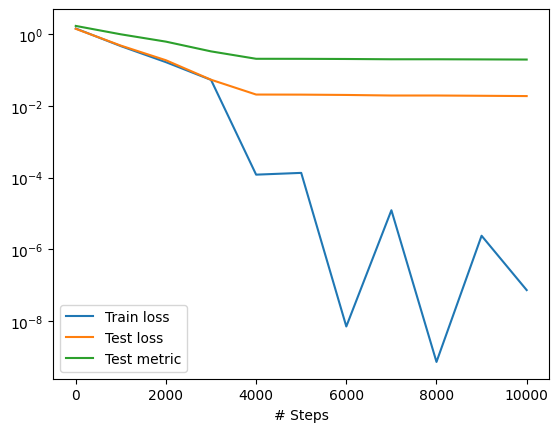

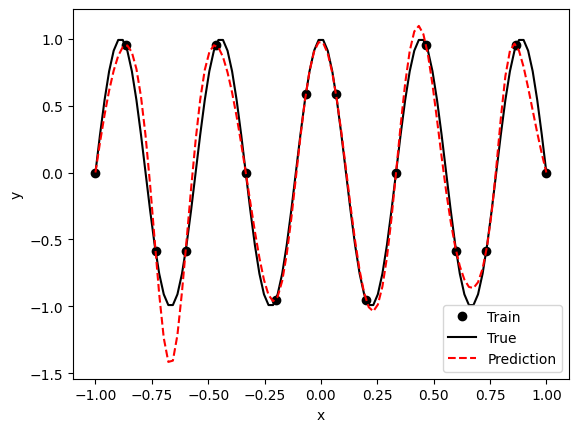

In [9]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)

a = np.linspace(-1 ,1)
b = np.ones(a.shape) * 10
input_x = np.column_stack((b, a))

In [10]:
preds = model.predict(input_x)

NameError: name 'input_x' is not defined

In [ ]:
trues = psi(input_x)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(a, preds, label='prediction')
plt.plot(a, trues, label='true values')
plt.legend()
plt.show()